---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
        embed-resources: true
---

## Introduction and Motivation
This is the page for exploratory data analysis. After making our processed data files, we wanted to explore the distributions of various features, the correlation between aspects of songs, and the statistical significance of differences between different categories. This will help us understand the data better, look for any preliminary interesting patterns and insights, and make informed decisions about the models we build as we go forward. Specifically, we looked at the song lyrics and the metadata about the music, their relationships, and their contribution onn song popularity and chart rankings. It will also allow us to look for anomalies to make sure that our data is suitable for ML tasks.

## Overview of Methods
This section uses data visualization, aggregation techniques, and conducts statistical tests to do a preliminary analysis of the data.

## Code

### Step 1: Import data and clean data
- Imported the data using pandas
- Isolated the rows that I thought might be helpful to analyze for this section of the analysis
- Replaced the null values in genre with "None listed" so I can still use the rest of the data (4 rows)
- Change VADER results into indvidual columns
- Displayed the results

In [1]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/processed-data/artist_song_masterlist.csv')
df.head()

,Track ID,Track Name,Song Popularity,Album,Song Release Date,Duration (ms),Artists,Explicit,Song Rank,Artist ID,...,Genre_trap latino,Genre_trap queen,Genre_twee pop,Genre_uk alternative pop,Genre_uk contemporary r&b,Genre_uk pop,Genre_urbano latino,Genre_viral rap,Genre_west coast rap,Genre_wonky
0,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!",93.0,"Good Luck, Babe!",2024-04-05,218423.0,Chappell Roan,False,1,7GlBOeep6PqTfFi59PTUUN,...,0,0,0,0,0,0,0,0,0,0
1,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,88.0,Not Like Us,2024-05-04,274192.0,Kendrick Lamar,True,2,2YZyLoL8N0Wb9xBt1NhZWg,...,0,0,0,0,0,0,0,0,1,0
2,2FQrifJ1N335Ljm3TjTVVf,A Bar Song (Tipsy),86.0,A Bar Song (Tipsy),2024-04-12,171291.0,Shaboozey,True,3,3y2cIKLjiOlp1Np37WiUdH,...,0,0,0,0,0,0,0,0,0,0
3,2HRqTpkrJO5ggZyyK6NPWz,Espresso,88.0,Short n' Sweet,2024-08-23,175459.0,Sabrina Carpenter,True,4,74KM79TiuVKeVCqs8QtB0B,...,0,0,0,0,0,0,0,0,0,0
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,96.0,HIT ME HARD AND SOFT,2024-05-17,210373.0,Billie Eilish,False,5,6qqNVTkY8uBg9cP3Jd7DAH,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_cl = df[['Track Name','Song Popularity','Album','Song Release Date','Duration (ms)','Artists','Explicit','Song Rank','Artist ID','Genres','Followers','Popularity','Lyrics','Total Artists On Song','Lyrics Word Count','Sentiment (VADER)']]
df_cl.loc[df_cl['Genres'].isna(), 'Genres'] = 'None Listed'
df_cl.loc[df_cl['Lyrics'] == "Lyrics not found!", 'Lyrics Word Count'] = 0
df_cl.loc[df_cl['Lyrics'] == "Lyrics not found!", 'Lyrics'] = ' '
df_cl = df_cl.dropna(subset='Lyrics')
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 97
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Track Name             94 non-null     object 
 1   Song Popularity        94 non-null     float64
 2   Album                  94 non-null     object 
 3   Song Release Date      94 non-null     object 
 4   Duration (ms)          94 non-null     float64
 5   Artists                94 non-null     object 
 6   Explicit               94 non-null     bool   
 7   Song Rank              94 non-null     int64  
 8   Artist ID              94 non-null     object 
 9   Genres                 94 non-null     object 
 10  Followers              94 non-null     int64  
 11  Popularity             94 non-null     int64  
 12  Lyrics                 94 non-null     object 
 13  Total Artists On Song  94 non-null     float64
 14  Lyrics Word Count      94 non-null     int64  
 15  Sentiment (VA

In [4]:
df_cl["Sentiment (VADER)"] = df_cl["Sentiment (VADER)"].apply(ast.literal_eval)

# Expand the dictionary into separate columns
sentiment_df = pd.json_normalize(df_cl["Sentiment (VADER)"])
sentiment_df = sentiment_df.reset_index(drop=True)

# Combine the expanded columns back with the original DataFrame
df_cl = df_cl.reset_index(drop=True)
df_cl = pd.concat([df_cl.drop(columns=["Sentiment (VADER)"]), sentiment_df], axis=1)
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Track Name             94 non-null     object 
 1   Song Popularity        94 non-null     float64
 2   Album                  94 non-null     object 
 3   Song Release Date      94 non-null     object 
 4   Duration (ms)          94 non-null     float64
 5   Artists                94 non-null     object 
 6   Explicit               94 non-null     bool   
 7   Song Rank              94 non-null     int64  
 8   Artist ID              94 non-null     object 
 9   Genres                 94 non-null     object 
 10  Followers              94 non-null     int64  
 11  Popularity             94 non-null     int64  
 12  Lyrics                 94 non-null     object 
 13  Total Artists On Song  94 non-null     float64
 14  Lyrics Word Count      94 non-null     int64  
 15  neg     

### Univariate Analysis

#### Summary Statistics
I ran .describe on the dataset to understand the distributiopn of values and decide if it was worth normalizing the data due to the wide range of possibilities for values for several of the columns. Duration, followers, and word count all range from very low to very high values, so it might be worth normalizing these columns before analysis.

In [5]:
df_cl.describe()

,Song Popularity,Duration (ms),Song Rank,Followers,Popularity,Total Artists On Song,Lyrics Word Count,neg,neu,pos,compound
count,94.000000,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000
mean,63.510638,212252.319149,49.372340,1.163717e+07,72.627660,1.319149,233.702128,0.092543,0.767011,0.140436,0.29302
std,19.227973,57749.294460,29.438467,2.373635e+07,17.228374,0.882479,179.263177,0.071248,0.107798,0.077664,0.79927
min,17.000000,120792.000000,1.000000,1.273000e+03,29.000000,1.000000,0.000000,0.000000,0.454000,0.000000,-0.99980
25%,48.250000,175601.000000,24.250000,2.208655e+05,60.000000,1.000000,132.500000,0.034250,0.701250,0.093750,-0.68960
50%,66.000000,196731.500000,48.500000,1.710836e+06,77.000000,1.000000,169.000000,0.084000,0.757500,0.131000,0.71875
75%,77.750000,241314.500000,75.500000,8.641217e+06,86.750000,1.000000,258.750000,0.140750,0.851000,0.189750,0.96500
max,98.000000,456933.000000,100.000000,1.280014e+08,100.000000,8.000000,1160.000000,0.373000,1.000000,0.426000,0.99840


#### Histograms

The next step is checking the distributions of all of my numeric variables to see if there's anything interesting. Keeping in mind that these are considered the top 100 songs of the week that we chose, I analyzed the characteristics of the songs and their lyrics.

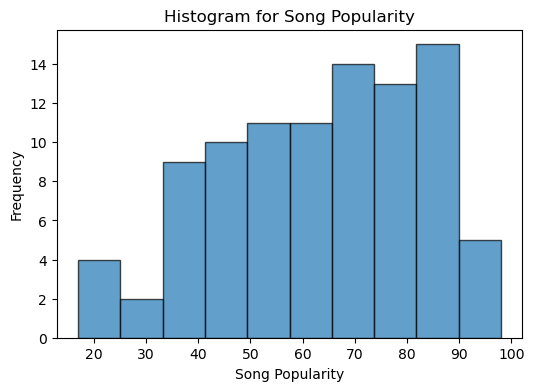

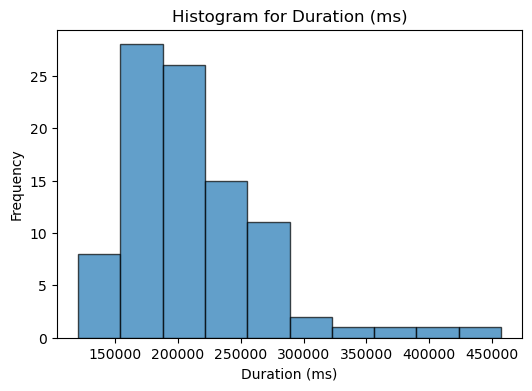

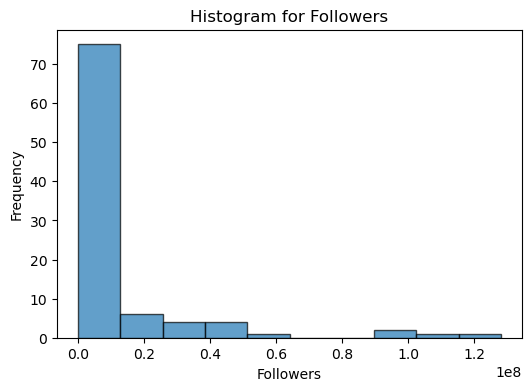

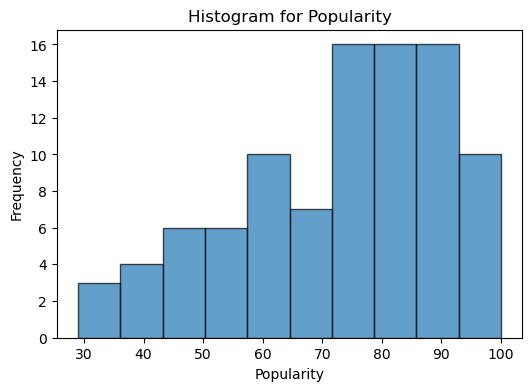

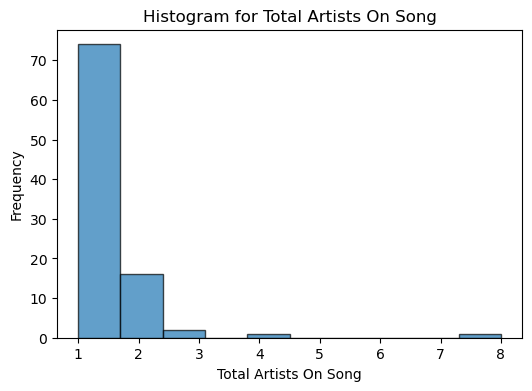

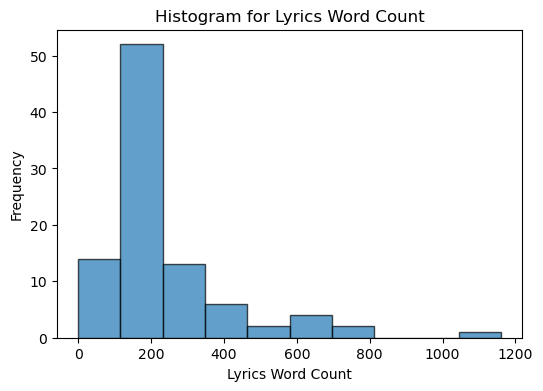

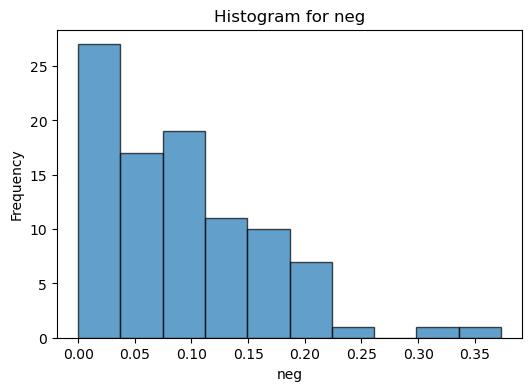

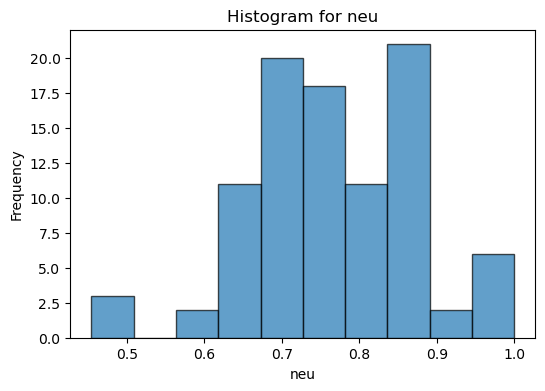

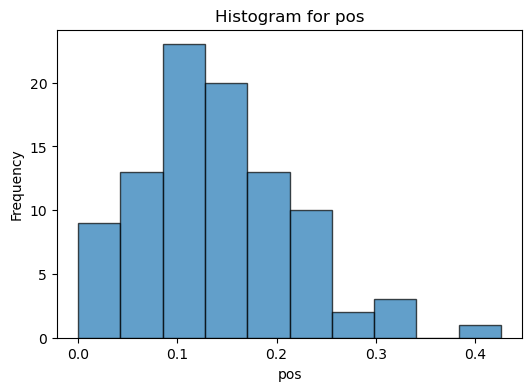

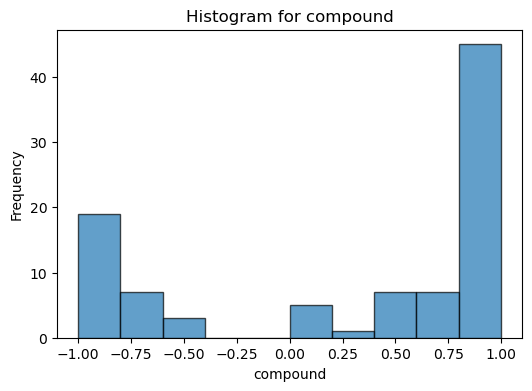

In [6]:
# Create individual histograms for selected columns
columns_to_plot = ['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 'Total Artists On Song', 'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound']
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(df_cl[column], edgecolor='black', alpha=0.7)
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


From the above graphs, it is interesting to observe that the popularity of the song is not as heavily skewed as I thought. Since these are the top songs, I expected the spotify popularity score to be generally very high, but this was not the case. Additionally, it is interesting to see so many trending songs from artists without very many followers on Spotify. I think this is indicative of the popularity that Tik Tok and other social media platforms can provide for less known artists. Despite this, the popularity of the artists on Spotify seems to be heavily skewed. Moving on to analysis about characteristics about the lyrics, it appears that the songs are largely not negative and tend to be more neutral or positive. This can be seen by the histogram for the compound score as well, with this graph showing a large number of songs with a positive compound score.

#### Genre Analysis
I decided to group the really diverse genres into distinct categories. I used chatgpt to create the categories and asked it to give preference to genres that are not pop if multiple genres are included. Then I mapped the genre column to my new categories and made a histogram.

In [7]:
def map_genres_to_categories(genres):
    # Define the mapping of specific genres to broader categories
    genre_mapping = {
        "Pop": [
            "pop", "social media pop", "dance pop", "modern country pop", "gen z singer-songwriter", "colombian pop", 
            "modern indie pop", "power pop", "la pop", "singer-songwriter pop", "uk pop", "alt z"
        ],
        "Indie/Alternative": [
            "indie pop", "modern alternative pop", "indie rock", "small room", "asheville indie", "sacramento indie", 
            "twee pop", "tape club", "bubblegrunge", "bedroom pop", "slacker rock", "irish indie rock", "irish post-punk"
        ],
        "Rock": [
            "album rock", "blues rock", "classic rock", "electric blues", "hard rock", "jam band", "southern rock", 
            "heartland rock", "garage rock", "modern blues rock", "modern rock", "punk blues", "noise rock", "no wave"
        ],
        "Country": [
            "classic texas country", "contemporary country", "country dawn", "country road", "countrygaze", 
            "deep new americana", "roots americana", "classic oklahoma country", "red dirt"
        ],
        "Hip Hop/Rap": [
            "hip hop", "rap", "west coast rap", "pop rap", "melodic rap", "houston rap", "atl hip hop", "trap", 
            "trap queen", "viral rap", "southern hip hop", "dfw rap", "canadian hip hop", "indian underground rap", 
            "desi hip hop", "malayalam hip hop", "irish hip hop", "conscious hip hop"
        ],
        "R&B": [
            "r&b", "alternative r&b", "uk contemporary r&b", "afro r&b"
        ],
        "Latin": [
            "reggaeton", "urbano latino", "trap latino", "reggaeton chileno", "reggaeton colombiano", "latin pop"
        ],
        "Afrobeat/African": [
            "afrobeats", "afropop", "azonto", "nigerian pop", "alte", "nigerian hip hop"
        ],
        "Electronic/Experimental": [
            "art pop", "metropopolis", "ambient folk", "freak folk", "hyperpop", "proto-hyperpop", "bubblegum bass", 
            "digital hardcore", "escape room", "experimental pop", "experimental hip hop", "deconstructed club", 
            "electronica", "glitch", "glitch hop", "jazztronica", "intelligent dance music", "psychedelic hip hop", 
            "wonky", "indietronica", "afrofuturism", "transpop", "uk alternative pop", "crank wave", "jersey club"
        ],
        "K-pop": [
            "k-pop", "k-pop girl group", "anime"
        ],
        "Other": [
            "None Listed"
        ]
    }

    for category, genre_list in genre_mapping.items():
        if genres.split(", ")[0] in genre_list:
            return category
        elif len(genres.split(","))>1:
            if genres.split(", ")[1] in genre_list:
                return category
    return "Other"

df_cl['Simplified Genre'] = df_cl['Genres'].apply(map_genres_to_categories)
df_cl[['Genres','Simplified Genre']].head()

,Genres,Simplified Genre
0,indie pop,Indie/Alternative
1,"conscious hip hop, hip hop, rap, west coast rap",Hip Hop/Rap
2,"modern country pop, pop rap",Pop
3,pop,Pop
4,"art pop, pop",Pop


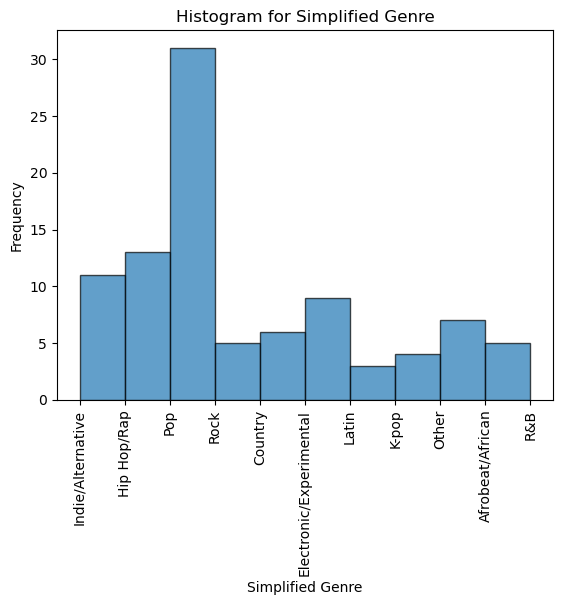

In [8]:
plt.hist(df_cl['Simplified Genre'], edgecolor='black', alpha=0.7)
plt.title(f"Histogram for Simplified Genre")
plt.xlabel("Simplified Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=90) 
plt.show()

From this, we can see that pop clearly dominates the top of the charts, but there is still a lot of diversity in the genre.

### Bivariate and Multivariate Analysis

- **Correlation Analysis**:
  - Analyze relationships between numerical variables using a correlation matrix.
  - Visualize with heatmaps or pair plots and discuss any strong correlations.
- **Crosstabulations**:
  - For categorical variables, use crosstabs to explore relationships and visualize them with grouped bar plots.
- **Feature Pairings**:
  - Analyze relationships between key variables, particularly those related to your target.
  - Visualize with scatter plots, box plots, or violin plots.

In [19]:
# Create a new column with bins of size 10
df_cl["Ranking Group"] = pd.cut(
    df_cl["Song Rank"], 
    bins=range(0, 101, 10),  # Bins from 0 to 100 in steps of 10
    labels=[f"{i+1}-{i+10}" for i in range(0, 100, 10)],  # Custom labels for bins
    right=True  # Include the left edge of the bin, exclude the right edge
)
df_cl["Top 10 Song"] = df_cl["Song Rank"].apply(lambda x: 1 if x <= 10 else 0)
# Display the result
df_cl[["Ranking Group", "Song Rank", "Top 10 Song"]]


,Ranking Group,Song Rank,Top 10 Song
0,1-10,1,1
1,1-10,2,1
2,1-10,3,1
3,1-10,4,1
4,1-10,5,1
...,...,...,...
89,91-100,96,0
90,91-100,97,0
91,91-100,98,0
92,91-100,99,0


In [20]:
sns.pairplot(df_cl[['Song Popularity', 'Duration (ms)', 'Followers', 'Popularity', 'Total Artists On Song', 'Lyrics Word Count', 'neg', 'neu', 'pos', 'compound', 'Ranking Group', 'Top 10 Song']], hue="Top 10 Song")

### Data Distribution and Normalization

- **Skewness and Kurtosis**:
    - Analyze and discuss the distribution of variables.
    - Apply transformations (e.g., log transformation) if needed for skewed data.
- **Normalization**:
    - Apply normalization or scaling techniques (e.g., min-max scaling, z-score).
    - Document and visualize the impact of normalization.

### Statistical Insights

- Conduct basic statistical tests (e.g., T-tests, ANOVA, chi-square) to explore relationships between variables.
- Summarize the statistical results and their implications for your analysis.

## Conclusions and Next Steps
Summarize your findings, interpret the results, and discuss their technical implications.
- **Summary of EDA Findings**:
    - Highlight the main takeaways from the EDA process (key trends, patterns, data quality issues).
- **Implications for Modeling**:
    - Discuss how your EDA informs the next steps in your project (e.g., feature selection, data transformations).
    - Outline any further data cleaning or preparation required before moving into modeling.